# Modelo de Aprendizaje no Superviasado
# Modelos de detección de anomalías

## Dataset: Credit Card Fraud Detection
## Objetivo: Entrenar un modelo que detecte si una operación es fraudulenta
## Fuente: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Índice<a name="indice"></a>
* [1 Prepocesado de datos](#1)
    * [1.1 Importación de librerías](#1_1)
    * [1.2 Carga del Dataset](#1_2)
* [2 Análisis Exploratorio de datos](#2)
    * [2.1 Estadísitcas descriptivas](#2_1)
* [3 Diseño de características](#3)
    * [3.1 Tratamiento de datos nulos](#3_1)
    * [3.2 Transformación de características](#3_2)
    * [3.3 Selección de características relevante](#3_3)
    * [3.4 Tratamiento de outliers](#3_4)
    * [3.5 Tratamiento de correlación](#3_5)
    * [3.6 Normalización](#3_6)
* [4 Local Outlier Factor (LOF)](#4) 
* [5 Isolation Tree](#5)


### Descripción de la fuente
Cuenta con un total de 30 variables predictoras X y una variable continua a predecir Y. El número total de muestras es de 284.807 transacciones.
El dataset contiene transacciones de tarjetas realizadas en septiembre de 2013 por entidades europeas. Estas transacciones ocurrieron en dos días, produciéndose un total de 492 transacciones fraudulentas de un total de 284.807. 

Todas las variables en este dataset son numericas. Dos de ellas son 'Time' y 'Amount', las cuales son variables originales. El resto, son resultado de una transformación PCA, siendo V1-V28 las componentes principales. Por motivos de confidencialidad no se proporcionan las variables originales ni más información sobre los datos.

* _Time_: segundos entre cada transacción y la primera transacción del dataset
* _Variables 'V1-V28'_: componentes principales de una transformación de variables utilizando PCA
* _Amount_: unidades monetarias de la transacción
* _Class_: Variable objetivo, indica si esa transacción es fraudulenta (1) o no es fraudulenta (0)

# 1 PREPRECESADO DE DATOS <a name="1"></a>
[Índice](#indice)

## 1.1 Importación de librerías <a name="1_1"></a>
[Índice](#indice)

In [19]:
import pandas as pd
import numpy as np

import seaborn as sns;
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor

from sklearn.ensemble import IsolationForest

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score


## 1.2 Carga del dataset <a name="1_2"></a>
[Índice](#indice)

In [49]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.shape

(284807, 31)

In [4]:
# Balanceo
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
# Balanceo
df['Class'].value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

# 2 PREPRECESADO DE DATOS <a name="2"></a>
[Índice](#indice)

## 2.1 Estadísticas descriptivas <a name="2_1"></a>
[Índice](#indice)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 3 DISEÑO DE CARACTERÍSTICAS <a name="3"></a>
[Índice](#indice)

## 3.1 Tratamiento de nulos <a name="3_1"></a>
[Índice](#indice)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.isin(['','?',' ']).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 3.2 Transformación de características <a name="3_2"></a>
[Índice](#indice)

In [10]:
# Transformaciones de tipo

In [11]:
# No es necesario hacer label encoding

In [12]:
# One hot encoding

In [13]:
# Seleccionamos las columnas generadas con OHE y las cambiamos a categóricas

## 3.3 Selección de características relevantes <a name="3_3"></a>
[Índice](#indice)

In [14]:
# Eliminar irrelevantes
df.drop(['Time'],axis=1,inplace=True)

## 3.4 Tratamiento de outliers <a name="3_4"></a>
[Índice](#indice)

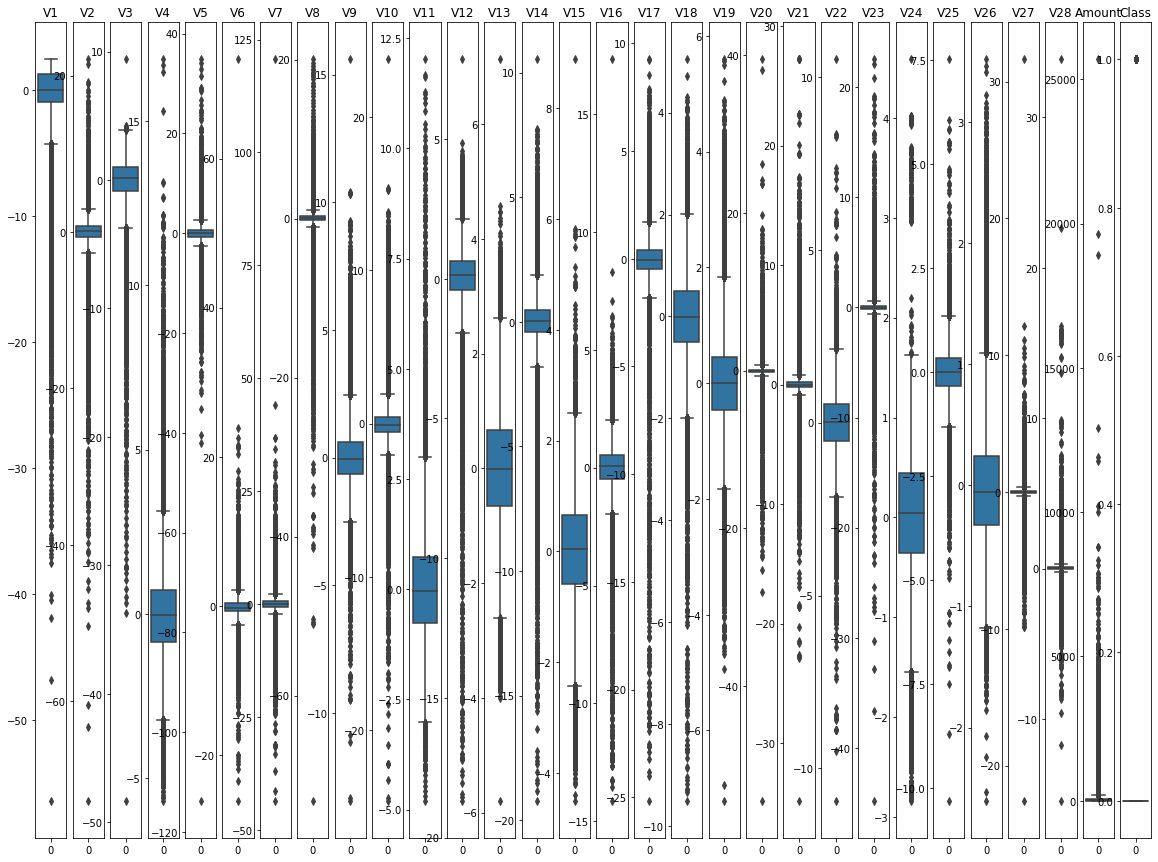

In [15]:
# Ver en una única gráfica después de normalizar
# Tratamiento de outliers
plt.subplots(sharex=False, sharey=False,figsize=(20,15))
for i in range(len(df.columns)):
    ax = plt.subplot(1,len(df.columns),i+1)
    sns.boxplot(data=df.iloc[:,i],ax=ax)
    ax.set_title(df.columns[i])

## 3.5 Tratamiento de Correlación <a name="3_5"></a>
[Índice](#indice)

<AxesSubplot:>

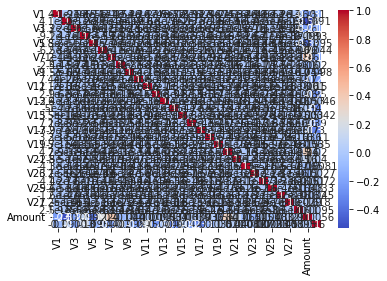

In [16]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

## 3.6 Normalización <a name="3_6"></a>
[Índice](#indice)

In [17]:
# Normalización
from scipy import stats
# Mostrar si las variables siguen una distribución normal según saphiro test
corte = 0.05
for c in df:    
    #Hacemos el saphiroTest
    stat,pvalor=stats.shapiro(df[c])
    #print(f"Variable:{c}\tEstadístico:{stat}\tP-valor:{pvalor}")
    if(pvalor>corte):            
        print(f"Variable {c} provine distribución normal p-valor>0.05\t:{pvalor}")
    else:            
        print(f"Variable {c} no proviene distribución  p-valor<=0.05\t:{pvalor}")

C:\Users\Profesor\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable V1 no proviene distribución  p-valor<=0.05	:0.0
Variable V2 no proviene distribución  p-valor<=0.05	:0.0
Variable V3 no proviene distribución  p-valor<=0.05	:0.0
Variable V4 no proviene distribución  p-valor<=0.05	:0.0
Variable V5 no proviene distribución  p-valor<=0.05	:0.0
Variable V6 no proviene distribución  p-valor<=0.05	:0.0
Variable V7 no proviene distribución  p-valor<=0.05	:0.0
Variable V8 no proviene distribución  p-valor<=0.05	:0.0
Variable V9 no proviene distribución  p-valor<=0.05	:0.0
Variable V10 no proviene distribución  p-valor<=0.05	:0.0
Variable V11 no proviene distribución  p-valor<=0.05	:0.0
Variable V12 no proviene distribución  p-valor<=0.05	:0.0
Variable V13 no proviene distribución  p-valor<=0.05	:2.3287412955609124e-31
Variable V14 no proviene distribución  p-valor<=0.05	:0.0
Variable V15 no proviene distribución  p-valor<=0.05	:0.0
Variable V16 no proviene distribución  p-valor<=0.05	:0.0
Variable V17 no proviene distribución  p-valor<=0.05	:0.0
Vari

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfNorm = sc.fit_transform(df)
dfNorm= pd.DataFrame(dfNorm,columns=df.columns)
dfNorm

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,4.000715,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,-0.041599
284803,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,-0.896292,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,-0.041599
284804,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,-0.445225,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,-0.041599
284805,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,-0.366558,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,-0.041599


# 4 Local Outlier Factor (LOF) <a name="4"></a>
[Índice](#indice)

In [50]:
x=df.drop(['Class'],axis=1)
y=df['Class']

In [51]:
modelo=LocalOutlierFactor()

In [ ]:
%%time
# Predicción
y_pred=modelo.fit_predict(x)
y_pred

In [23]:
# Crear df con las clase real y la clase estimada
dfDT = pd.DataFrame(y_pred,columns=['Pred'])
dfDT = pd.concat([x,dfDT,df['Class']],axis=1)

In [47]:
#Nº de anomalías en % obtenidas
dfDT['Pred'].value_counts()/len(dfDT)*100

 1    96.214981
-1     3.785019
Name: Pred, dtype: float64

In [ ]:
# -1, son la instancias marcadas como anómlas. Ha identificado 3% más de las que hay realmente

In [48]:
# Nº de anomalías en % reales
df['Class'].value_counts()/len(df)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [27]:
# Ver negativel LOF
lof=pd.DataFrame(modelo.negative_outlier_factor_,columns=['LOF'])
lof

,LOF
0,-1.000573
1,-1.451397
2,-1.166106
3,-1.019179
4,-1.025227
...,...
284802,-1.243626
284803,-1.107746
284804,-1.033923
284805,-1.101336


In [28]:
# Matriz de confusión (Codificamos como 0 - No es fraudulenta y 1 si es fraudulenta)
dfDT.loc[dfDT['Pred']==1,'PredBin']=0
dfDT.loc[dfDT['Pred']==-1,'PredBin']=1
dfDT

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Pred,Class,PredBin
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,1,0,0.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,1,0,0.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,1,0,0.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,1,0,0.0


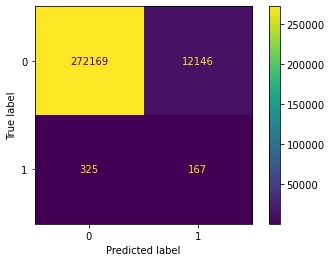

In [29]:
mc=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(dfDT['Class'],dfDT['PredBin']),display_labels=['0','1'])
mc.plot()

In [30]:
# Mostrar métricas
print(f"Accuracy:{accuracy_score(dfDT['Class'],dfDT['PredBin'])}")
print(f"Precision:{precision_score(dfDT['Class'],dfDT['PredBin'])}")
print(f"Recall:{recall_score(dfDT['Class'],dfDT['PredBin'])}")
print(f"f1_score:{f1_score(dfDT['Class'],dfDT['PredBin'])}")
print(f"AUC:{roc_auc_score(dfDT['Class'],dfDT['PredBin'])}")

Accuracy:0.9562124526433691
Precision:0.013562900998944206
Recall:0.3394308943089431
f1_score:0.02608356110894182
AUC:0.6483553360101422


In [ ]:
# El accuracy es muy bueno porque hay muy pocas instancias anómalas, pero el resultado 
# ha sido muy malo ya que el resto de parámetros son muy bajos.

In [32]:
# Para intentar mejorar el resultado, se podría repetir el proceso modificando el nº de vecinos = 5

In [33]:
# También se podría hacer otra prueba si eliminar la varable time

# 5 Isolation Tree <a name="5"></a>
[Índice](#indice)

In [34]:
modelo=IsolationForest()

In [35]:
%%time
# Predicción
y_pred=modelo.fit_predict(x)

CPU times: total: 18.7 s
Wall time: 18.8 s


In [36]:
# Crear df
dfDT = pd.DataFrame(y_pred,columns=['Pred'])
dfDT = pd.concat([x,dfDT,df['Class']],axis=1)

In [38]:
#Nº de anomalías en % obtenidas
dfDT['Pred'].value_counts()/len(dfDT)

 1    0.96215
-1    0.03785
Name: Pred, dtype: float64

In [39]:
# Nº de anomalías en % reales
df['Class'].value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [40]:
# Matriz de confusión (Codificamos como 0 - No es fraudulenta y 1 si es fraudulenta)
dfDT.loc[dfDT['Pred']==1,'PredBin']=0
dfDT.loc[dfDT['Pred']==-1,'PredBin']=1
dfDT

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Pred,Class,PredBin
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,-1,0,1.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,1,0,0.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,1,0,0.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,1,0,0.0


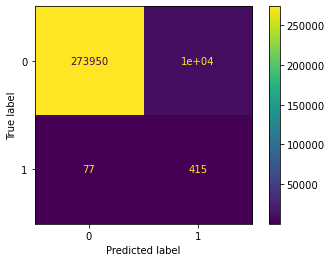

In [41]:
mc=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(dfDT['Class'],dfDT['PredBin']),display_labels=['0','1'])
mc.plot()

In [42]:
# Mostrar métricas
print(f"Accuracy:{accuracy_score(dfDT['Class'],dfDT['PredBin'])}")
print(f"Precision:{precision_score(dfDT['Class'],dfDT['PredBin'])}")
print(f"Recall:{recall_score(dfDT['Class'],dfDT['PredBin'])}")
print(f"f1_score:{f1_score(dfDT['Class'],dfDT['PredBin'])}")
print(f"AUC:{roc_auc_score(dfDT['Class'],dfDT['PredBin'])}")

Accuracy:0.9633365752948488
Precision:0.03849721706864564
Recall:0.8434959349593496
f1_score:0.07363378282469836
AUC:0.9035199457432206


In [ ]:
# El resultado ha mejorado. Cabe destacar que el recall es bastante bueno con este algorito,
# por lo que se detectan el 85% de operaciones fraudulentas.
# El precision es bajo porque la mayoría no son fraudulentas, por eso es de un 3%
# EL AUC es muy bueno.